# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*.cali"))

In [3]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              78533817      1   
                                                  579770131     1   
                                                  662845811     1   
                                                  964694533     1   
                                                  1482876213    1   
                                                  2590653385    1   
                                                  3443643022    1   
                                                  3691845482    1   
{'name': 'comm', 'type': 'function'}              78533817      3   
                                                  579770131     3   
                                                  662845811     3   
                                                  964694533     3   
                                                  1482876213    3   
                                                  2590653385    3   
                                                  3443643022    3   
                                                  3691845482    3   
{'name': 'comm_large', 'type': 'function'}        78533817      4   
                                                  579770131     4   
                                                  662845811     4   
                                                  964694533     4   
                                                  1482876213    4   
                                                  2590653385    4   
                                                  3443643022    4   
                                                  3691845482    4   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   78533817      8   
                                                  579770131     8   
                                                  662845811     8   
                                                  964694533     8   
                                                  1482876213    8   
                                                  2590653385    8   
                                                  3443643022    8   
                                                  3691845482    8   
{'name': 'cuda_memcpy_h2d', 'type': 'function'}   78533817      5   
                                                  579770131     5   
                                                  662845811     5   
                                                  964694533     5   
                                                  1482876213    5   
                                                  2590653385    5   
                                                  3443643022    5   
                                                  3691845482    5   
{'name': 'comp', 'type': 'function'}              78533817      6   
                                                  579770131     6   
                                                  662845811     6   
                                                  964694533     6   
                                                  1482876213    6   
                                                  2590653385    6   
                                                  3443643022    6   
                                                  3691845482    6   
{'name': 'comp_large', 'type': 'function'}        78533817      7   
                                                  579770131     7   
                                                  662845811     7   
                                                  964694533     7   
                                                  1482876213    7   
                                                  2590653385    7   
                                                  3443643022    7   
                                                  3691845482    7   
{'name': 'correctness_check', 'type': 'function'} 78533817  

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
78533817,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t4194304-v1.cali,1701312419,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 4194304, 1]",g,Quick Sort,CUDA,int,4,4194304,Random,1,4194304,4,https://github.com/saigowri/CUDA/blob/master/q...
579770131,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v1.cali,1701312269,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 65536, 1]",g,Quick Sort,CUDA,int,4,65536,Random,1,65536,4,https://github.com/saigowri/CUDA/blob/master/q...
662845811,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t262144-v64.cali,1701312350,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 262144, 64]",g,Quick Sort,CUDA,int,4,262144,Random,64,4096,4,https://github.com/saigowri/CUDA/blob/master/q...
964694533,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1048576-v1.cali,1701312389,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 1048576, 1]",g,Quick Sort,CUDA,int,4,1048576,Random,1,1048576,4,https://github.com/saigowri/CUDA/blob/master/q...
1482876213,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v64.cali,1701312329,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 65536, 64]",g,Quick Sort,CUDA,int,4,65536,Random,64,1024,4,https://github.com/saigowri/CUDA/blob/master/q...
2590653385,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t4194304-v64.cali,1701312449,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 4194304, 64]",g,Quick Sort,CUDA,int,4,4194304,Random,64,65536,4,https://github.com/saigowri/CUDA/blob/master/q...
3443643022,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t262144-v1.cali,1701312389,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 262144, 1]",g,Quick Sort,CUDA,int,4,262144,Random,1,262144,4,https://github.com/saigowri/CUDA/blob/master/q...
3691845482,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1048576-v64.cali,1701312389,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 1048576, 64]",g,Quick Sort,CUDA,int,4,1048576,Random,64,16384,4,https://github.com/saigowri/CUDA/blob/master/q...


In [5]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     ├─ \x1b1.000\x1b cuda_memcpy_d2h\x1b\n│     └─ \x1b1.000\x1b cuda_memcpy_h2d\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n├─ \x1b1.000\x1b correctness_check\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [6]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 cuda_memcpy_d2h
│     └─ 1.000 cuda_memcpy_h2d
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ab3700516a0>, 262144: <thicket.thicket.Thicket object at 0x2ab370046a90>, 1048576: <thicket.thicket.Thicket object at 0x2ab36ffbdd90>, 4194304: <thicket.thicket.Thicket object at 0x2ab3700005b0>}


In [8]:
print(gb)

{65536: <thicket.thicket.Thicket object at 0x2ab3700516a0>, 262144: <thicket.thicket.Thicket object at 0x2ab370046a90>, 1048576: <thicket.thicket.Thicket object at 0x2ab36ffbdd90>, 4194304: <thicket.thicket.Thicket object at 0x2ab3700005b0>}


In [9]:
print(gb.values())


dict_values([<thicket.thicket.Thicket object at 0x2ab3700516a0>, <thicket.thicket.Thicket object at 0x2ab370046a90>, <thicket.thicket.Thicket object at 0x2ab36ffbdd90>, <thicket.thicket.Thicket object at 0x2ab3700005b0>])


Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [11]:
ctk.dataframe

65536  \
                                                                nid   
node                                              num_threads         
{'name': 'main', 'type': 'function'}              1               1   
                                                  64              1   
{'name': 'comm', 'type': 'function'}              1               3   
                                                  64              3   
{'name': 'comm_large', 'type': 'function'}        1               4   
                                                  64              4   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   1               8   
                                                  64              8   
{'name': 'cuda_memcpy_h2d', 'type': 'function'}   1               5   
                                                  64              5   
{'name': 'comp', 'type': 'function'}              1               6   
                                                  64              6   
{'name': 'comp_large', 'type': 'function'}        1               7   
                                                  64              7   
{'name': 'correctness_check', 'type': 'function'} 1               9   
                                                  64              9   
{'name': 'data_init', 'type': 'function'}         1               2   
                                                  64              2   

                                                                              \
                                                                spot.channel   
node                                              num_threads                  
{'name': 'main', 'type': 'function'}              1            regionprofile   
                                                  64           regionprofile   
{'name': 'comm', 'type': 'function'}              1            regionprofile   
                                                  64           regionprofile   
{'name': 'comm_large', 'type': 'function'}        1            regionprofile   
                                                  64           regionprofile   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   1            regionprofile   
                                                  64           regionprofile   
{'name': 'cuda_memcpy_h2d', 'type': 'function'}   1            regionprofile   
                                                  64           regionprofile   
{'name': 'comp', 'type': 'function'}              1            regionprofile   
                                                  64           regionprofile   
{'name': 'comp_large', 'type': 'function'}        1            regionprofile   
                                                  64           regionprofile   
{'name': 'correctness_check', 'type': 'function'} 1            regionprofile   
                                                  64           regionprofile   
{'name': 'data_init', 'type': 'function'}         1            regionprofile   
                                                  64           regionprofile   

                                                                             \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              1                0.461050   
                                                  64               0.421186   
{'name': 'comm', 'type': 'function'}              1                0.000264   
                                                  64               0.000258   
{'name': 'comm_large', 'type': 'function'}        1                0.000238   
                                                  64               0.000233   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   1                0.000093   
                                                  64               0.000092   
{'name': 'cuda_memcp

Perform pandas operations to get the table in a desirable format for plotting

In [12]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [13]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "nid"), (65536, "nid")], axis=1)

# ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
# ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)
# Rename index to remove tuple
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# # Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [14]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [16]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [17]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [18]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [19]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [20]:
ctk.dataframe

65536                    \
                              Avg time/rank Avg GPU time/rank   
name              num_threads                                   
main              1                0.461050          0.000048   
                  64               0.421186          0.000047   
comm              1                0.000264          0.000048   
                  64               0.000258          0.000047   
comm_large        1                0.000238          0.000048   
                  64               0.000233          0.000047   
cuda_memcpy_d2h   1                0.000093          0.000023   
                  64               0.000092          0.000023   
cuda_memcpy_h2d   1                0.000095          0.000025   
                  64               0.000093          0.000025   
comp              1                0.000037               NaN   
                  64               0.000037               NaN   
comp_large        1                0.000021               NaN   
                  64               0.000021               NaN   
correctness_check 1                0.000006               NaN   
                  64               0.000006               NaN   
data_init         1                0.001470               NaN   
                  64               0.001457               NaN   

                                                                   \
                              Min GPU time/rank Max GPU time/rank   
name              num_threads                                       
main              1                    0.000048          0.000048   
                  64                   0.000047          0.000047   
comm              1                    0.000048          0.000048   
                  64                   0.000047          0.000047   
comm_large        1                    0.000048          0.000048   
                  64                   0.000047          0.000047   
cuda_memcpy_d2h   1                    0.000023          0.000023   
                  64                   0.000023          0.000023   
cuda_memcpy_h2d   1                    0.000025          0.000025   
                  64                   0.000025          0.000025   
comp              1                         NaN               NaN   
                  64                        NaN               NaN   
comp_large        1                         NaN               NaN   
                  64                        NaN               NaN   
correctness_check 1                         NaN               NaN   
                  64                        NaN               NaN   
data_init         1                         NaN               NaN   
                  64                        NaN               NaN   

                                                    262144                    \
                              Total GPU time Avg time/rank Avg GPU time/rank   
name              num_threads                                                  
main              1                 0.000048      0.644702          0.000172   
                  64                0.000047      0.469641          0.000172   
comm              1                 0.000048      0.000704          0.000172   
                  64                0.000047      0.000667          0.000172   
comm_large        1                 0.000048      0.000676          0.000172   
                  64                0.000047      0.000639          0.000172   
cuda_memcpy_d2h   1                 0.000023      0.000269          0.000083   
                  64                0.000023      0.000264          0.000083   
cuda_memcpy_h2d   1                 0.000025      0.000299          0.000089   
                  64                0.000025      0.000261          0.000089   
comp              1                      NaN      0.000058               NaN   
                  64                     NaN      0.000041               NaN   
comp_large        1   

In [21]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min GPU time/rank"), (262144, "Min GPU time/rank"), (1048576, "Min GPU time/rank"), (4194304, "Min GPU time/rank")], axis=1)

In [22]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max GPU time/rank"), (262144, "Max GPU time/rank"), (1048576, "Max GPU time/rank"), (4194304, "Max GPU time/rank")], axis=1)

In [23]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total GPU time"), (262144, "Total GPU time"), (1048576, "Total GPU time"), (4194304, "Total GPU time")], axis=1)

In [24]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [25]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [26]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Avg GPU time/rank"), (262144, "Avg GPU time/rank"), (1048576, "Avg GPU time/rank"), (4194304, "Avg GPU time/rank")], axis=1)

In [27]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [28]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [29]:
# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc[:,(65536)] # all rows 1 column
# df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
# df_1

# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

In [30]:
# import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

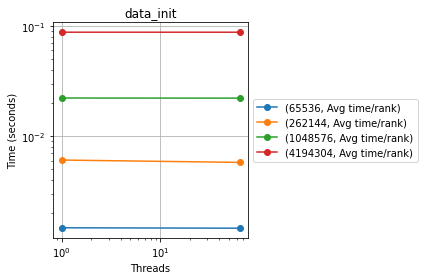

<Figure size 1440x1440 with 0 Axes>

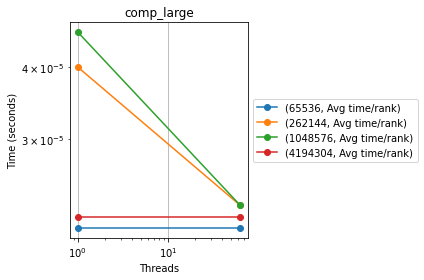

<Figure size 1440x1440 with 0 Axes>

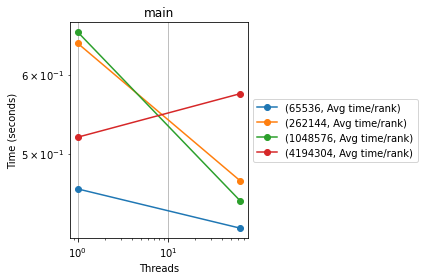

<Figure size 1440x1440 with 0 Axes>

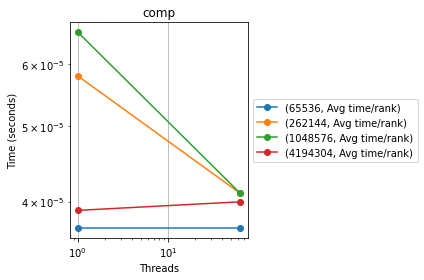

<Figure size 1440x1440 with 0 Axes>

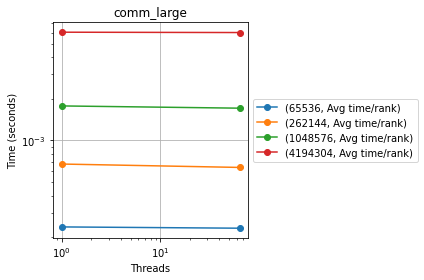

<Figure size 1440x1440 with 0 Axes>

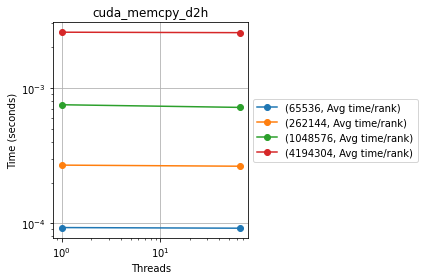

<Figure size 1440x1440 with 0 Axes>

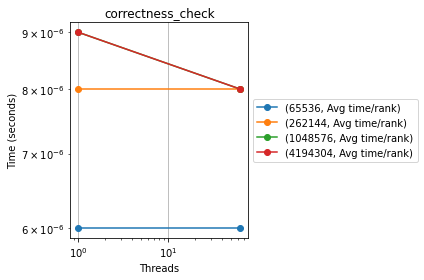

<Figure size 1440x1440 with 0 Axes>

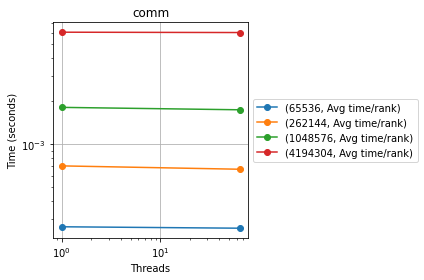

<Figure size 1440x1440 with 0 Axes>

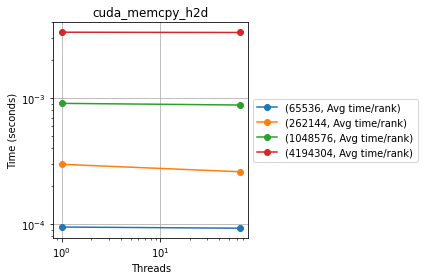

In [31]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [70]:
# ctk.dataframe

## SPEEDUP


In [32]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [33]:
speedup_df

65536        262144       1048576  \
                              Avg time/rank Avg time/rank Avg time/rank   
name              num_threads                                             
main              1                1.000000      1.000000      1.000000   
                  64               1.094647      1.372755      1.475368   
comm              1                1.000000      1.000000      1.000000   
                  64               1.023256      1.055472      1.039701   
comm_large        1                1.000000      1.000000      1.000000   
                  64               1.021459      1.057903      1.038034   
cuda_memcpy_d2h   1                1.000000      1.000000      1.000000   
                  64               1.010870      1.018939      1.045961   
cuda_memcpy_h2d   1                1.000000      1.000000      1.000000   
                  64               1.021505      1.145594      1.030543   
comp              1                1.000000      1.000000      1.000000   
                  64               1.000000      1.414634      1.609756   
comp_large        1                1.000000      1.000000      1.000000   
                  64               1.000000      1.739130      2.000000   
correctness_check 1                1.000000      1.000000      1.000000   
                  64               1.000000      1.000000      1.125000   
data_init         1                1.000000      1.000000      1.000000   
                  64               1.008922      1.050633      1.002850   

                                    4194304  
                              Avg time/rank  
name              num_threads                
main              1                1.000000  
                  64               0.904640  
comm              1                1.000000  
                  64               1.005471  
comm_large        1                1.000000  
                  64               1.005668  
cuda_memcpy_d2h   1                1.000000  
                  64               1.007816  
cuda_memcpy_h2d   1                1.000000  
                  64               1.005108  
comp              1                1.000000  
                  64               0.975000  
comp_large        1                1.000000  
                  64               1.000000  
correctness_check 1                1.000000  
                  64               1.125000  
data_init         1                1.000000  
                  64               1.000319

<Figure size 1440x1440 with 0 Axes>

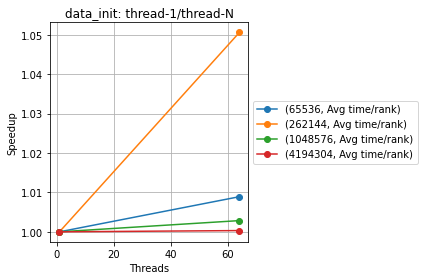

<Figure size 1440x1440 with 0 Axes>

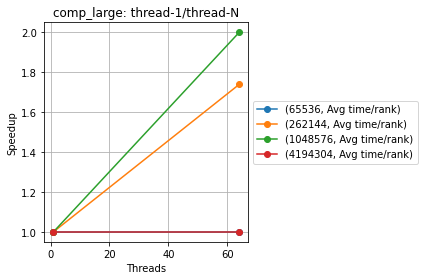

<Figure size 1440x1440 with 0 Axes>

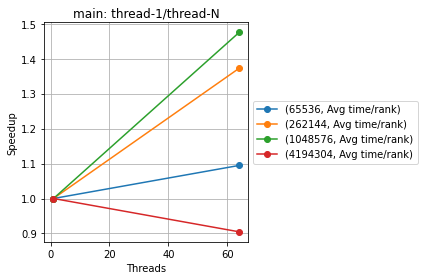

<Figure size 1440x1440 with 0 Axes>

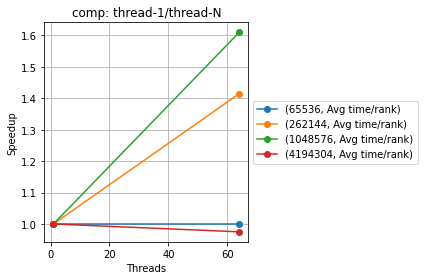

<Figure size 1440x1440 with 0 Axes>

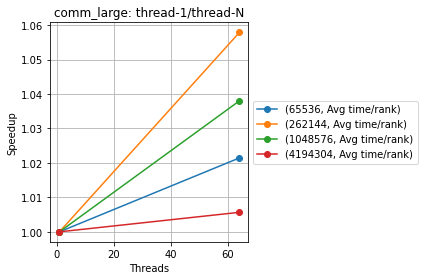

<Figure size 1440x1440 with 0 Axes>

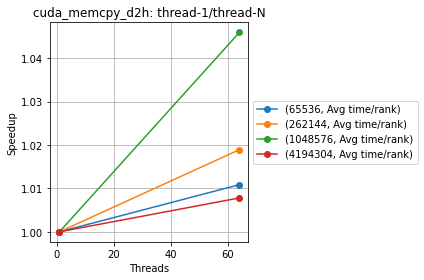

<Figure size 1440x1440 with 0 Axes>

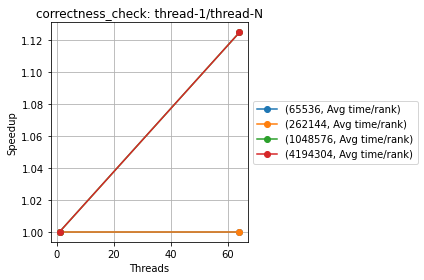

<Figure size 1440x1440 with 0 Axes>

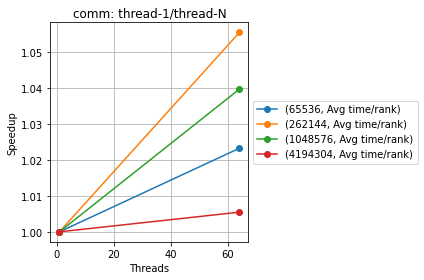

<Figure size 1440x1440 with 0 Axes>

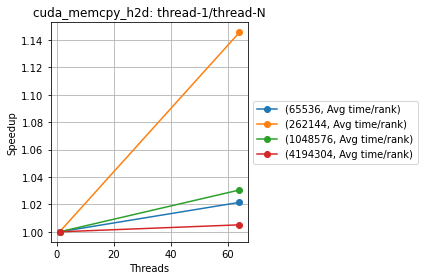

In [34]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

## Weak Scaling ---------------------------------------------------------------------------------------

In [35]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("random-1/*.cali"))

In [36]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              3895774       1   
                                                  1037931267    1   
                                                  1173415181    1   
                                                  3982476170    1   
{'name': 'comm', 'type': 'function'}              3895774       3   
                                                  1037931267    3   
                                                  1173415181    3   
                                                  3982476170    3   
{'name': 'comm_large', 'type': 'function'}        3895774       4   
                                                  1037931267    4   
                                                  1173415181    4   
                                                  3982476170    4   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   3895774       8   
                                                  1037931267    8   
                                                  1173415181    8   
                                                  3982476170    8   
{'name': 'cuda_memcpy_h2d', 'type': 'function'}   3895774       5   
                                                  1037931267    5   
                                                  1173415181    5   
                                                  3982476170    5   
{'name': 'comp', 'type': 'function'}              3895774       6   
                                                  1037931267    6   
                                                  1173415181    6   
                                                  3982476170    6   
{'name': 'comp_large', 'type': 'function'}        3895774       7   
                                                  1037931267    7   
                                                  1173415181    7   
                                                  3982476170    7   
{'name': 'correctness_check', 'type': 'function'} 3895774       9   
                                                  1037931267    9   
                                                  1173415181    9   
                                                  3982476170    9   
{'name': 'data_init', 'type': 'function'}         3895774       2   
                                                  1037931267    2   
                                                  1173415181    2   
                                                  3982476170    2   

                                                               spot.channel  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              3895774     regionprofile   
                                                  1037931267  regionprofile   
                                                  1173415181  regionprofile   
                                                  3982476170  regionprofile   
{'name': 'comm', 'type': 'function'}              3895774     regionprofile   
                                                  1037931267  regionprofile   
                                                  1173415181  regionprofile   
                                                  3982476170  regionprofile   
{'name': 'comm_large', 'type': 'function'}        3895774     regionprofile   
                                                  1037931267  regionprofile   
                                                  1173415181  regionprofile   
                                                  3982476170  regionprofile   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   3895774     regionprofile   
                                                  1037931267  regionprofile   
                                                  1173415181  regionprofile   
                                                  3982476170  regionprofile   
{'name': 'cuda_me

In [37]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
3895774,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t262144-v64.cali,1701312350,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 262144, 64]",g,Quick Sort,CUDA,int,4,262144,Random,64,4096,4,https://github.com/saigowri/CUDA/blob/master/q...
1037931267,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t4194304-v64.cali,1701312449,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 4194304, 64]",g,Quick Sort,CUDA,int,4,4194304,Random,64,65536,4,https://github.com/saigowri/CUDA/blob/master/q...
1173415181,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1048576-v64.cali,1701312389,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 1048576, 64]",g,Quick Sort,CUDA,int,4,1048576,Random,64,16384,4,https://github.com/saigowri/CUDA/blob/master/q...
3982476170,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v64.cali,1701312329,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quick, 65536, 64]",g,Quick Sort,CUDA,int,4,65536,Random,64,1024,4,https://github.com/saigowri/CUDA/blob/master/q...


In [38]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     ├─ \x1b1.000\x1b cuda_memcpy_d2h\x1b\n│     └─ \x1b1.000\x1b cuda_memcpy_h2d\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n├─ \x1b1.000\x1b correctness_check\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [39]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2aaeb2a6ae20>, 262144: <thicket.thicket.Thicket object at 0x2aaeb2e29940>, 1048576: <thicket.thicket.Thicket object at 0x2aaeb2e2db20>, 4194304: <thicket.thicket.Thicket object at 0x2aaeb2d13940>}


In [40]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [41]:
ctk.dataframe

65536  \
                                                                nid   
node                                              num_threads         
{'name': 'main', 'type': 'function'}              64              1   
{'name': 'comm', 'type': 'function'}              64              3   
{'name': 'comm_large', 'type': 'function'}        64              4   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   64              8   
{'name': 'cuda_memcpy_h2d', 'type': 'function'}   64              5   
{'name': 'comp', 'type': 'function'}              64              6   
{'name': 'comp_large', 'type': 'function'}        64              7   
{'name': 'correctness_check', 'type': 'function'} 64              9   
{'name': 'data_init', 'type': 'function'}         64              2   

                                                                              \
                                                                spot.channel   
node                                              num_threads                  
{'name': 'main', 'type': 'function'}              64           regionprofile   
{'name': 'comm', 'type': 'function'}              64           regionprofile   
{'name': 'comm_large', 'type': 'function'}        64           regionprofile   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   64           regionprofile   
{'name': 'cuda_memcpy_h2d', 'type': 'function'}   64           regionprofile   
{'name': 'comp', 'type': 'function'}              64           regionprofile   
{'name': 'comp_large', 'type': 'function'}        64           regionprofile   
{'name': 'correctness_check', 'type': 'function'} 64           regionprofile   
{'name': 'data_init', 'type': 'function'}         64           regionprofile   

                                                                             \
                                                              Min time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.421186   
{'name': 'comm', 'type': 'function'}              64               0.000258   
{'name': 'comm_large', 'type': 'function'}        64               0.000233   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   64               0.000092   
{'name': 'cuda_memcpy_h2d', 'type': 'function'}   64               0.000093   
{'name': 'comp', 'type': 'function'}              64               0.000037   
{'name': 'comp_large', 'type': 'function'}        64               0.000021   
{'name': 'correctness_check', 'type': 'function'} 64               0.000006   
{'name': 'data_init', 'type': 'function'}         64               0.001457   

                                                                             \
                                                              Max time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.421186   
{'name': 'comm', 'type': 'function'}              64               0.000258   
{'name': 'comm_large', 'type': 'function'}        64               0.000233   
{'name': 'cuda_memcpy_d2h', 'type': 'function'}   64               0.000092   
{'name': 'cuda_memcpy_h2d', 'type': 'function'}   64               0.000093   
{'name': 'comp', 'type': 'function'}              64               0.000037   
{'name': 'comp_large', 'type': 'function'}        64               0.000021   
{'name': 'correctness_check', 'type': 'function'} 64               0.000006   
{'name': 'data_init', 'type': 'function'}         64               0.001457   

                                                                             \
                                                              Avg time/rank   
node                                              num_threads                 
{'name': 'main', 'type': 'function'}              64               0.421186   
{'name': 'comm', 'type': 'function

In [42]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [43]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [44]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [45]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [46]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [47]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [48]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [49]:
ctk.dataframe

65536                    \
                              Avg time/rank Avg GPU time/rank   
name              num_threads                                   
main              64               0.421186          0.000047   
comm              64               0.000258          0.000047   
comm_large        64               0.000233          0.000047   
cuda_memcpy_d2h   64               0.000092          0.000023   
cuda_memcpy_h2d   64               0.000093          0.000025   
comp              64               0.000037               NaN   
comp_large        64               0.000021               NaN   
correctness_check 64               0.000006               NaN   
data_init         64               0.001457               NaN   

                                                                   \
                              Min GPU time/rank Max GPU time/rank   
name              num_threads                                       
main              64                   0.000047          0.000047   
comm              64                   0.000047          0.000047   
comm_large        64                   0.000047          0.000047   
cuda_memcpy_d2h   64                   0.000023          0.000023   
cuda_memcpy_h2d   64                   0.000025          0.000025   
comp              64                        NaN               NaN   
comp_large        64                        NaN               NaN   
correctness_check 64                        NaN               NaN   
data_init         64                        NaN               NaN   

                                                    262144                    \
                              Total GPU time Avg time/rank Avg GPU time/rank   
name              num_threads                                                  
main              64                0.000047      0.469641          0.000172   
comm              64                0.000047      0.000667          0.000172   
comm_large        64                0.000047      0.000639          0.000172   
cuda_memcpy_d2h   64                0.000023      0.000264          0.000083   
cuda_memcpy_h2d   64                0.000025      0.000261          0.000089   
comp              64                     NaN      0.000041               NaN   
comp_large        64                     NaN      0.000023               NaN   
correctness_check 64                     NaN      0.000008               NaN   
data_init         64                     NaN      0.005767               NaN   

                                                                   \
                              Min GPU time/rank Max GPU time/rank   
name              num_threads                                       
main              64                   0.000172          0.000172   
comm              64                   0.000172          0.000172   
comm_large        64                   0.000172          0.000172   
cuda_memcpy_d2h   64                   0.000083          0.000083   
cuda_memcpy_h2d   64                   0.000089          0.000089   
comp              64                        NaN               NaN   
comp_large        64                        NaN               NaN   
correctness_check 64                        NaN               NaN   
data_init         64                        NaN               NaN   

                                                   1048576                    \
                              Total GPU time Avg time/rank Avg GPU time/rank   
name              num_threads                                                  
main              64                0.000172      0.448421          0.001189   
comm              64                0.000172      0.001738          0.001189   
comm_large        64                0.000172      0.001709          0.001189   
cuda_memcpy_d2h   64                0.000083      0.000718          0.000482   
cuda_memcpy_h2d   64                0.000089      0.000884          0.000707  

In [50]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [51]:
# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc['main','comm','comm_large','cudaMemcpy_1','comp','comp_large','data_init'] # all rows 1 column


# df_1 = ctk.dataframe.loc[:] # all rows 1 column

# df_1

df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
# df_1
# df_1 = ctk.dataframe.reset_index().drop([("name", "")], axis=1)
# df_1
# df_1 = df_1.loc[]

df_2 = df_1.loc[[64,128,256,512]]
df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

KeyError: '[128, 256, 512] not in index'

In [52]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

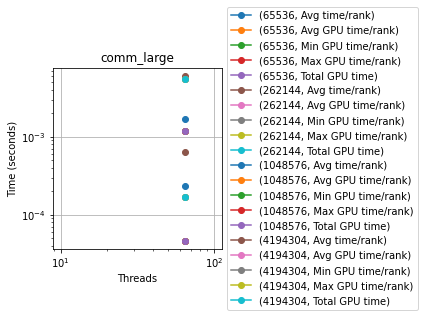

<Figure size 1440x1440 with 0 Axes>

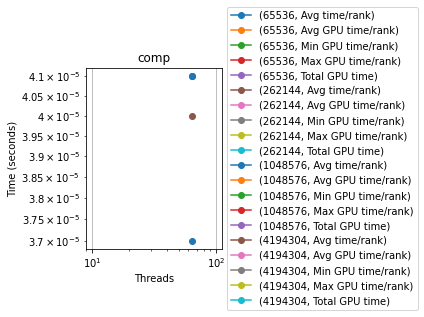

<Figure size 1440x1440 with 0 Axes>

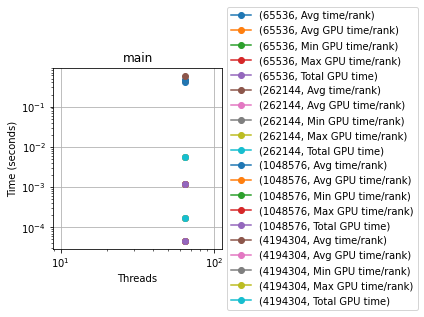

<Figure size 1440x1440 with 0 Axes>

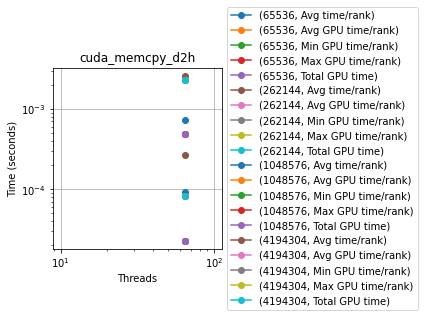

<Figure size 1440x1440 with 0 Axes>

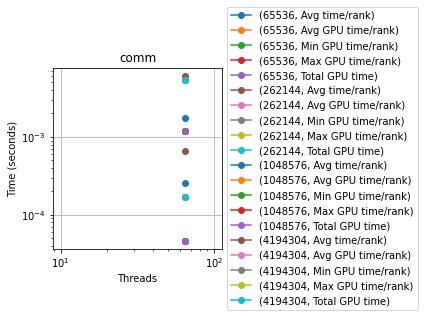

<Figure size 1440x1440 with 0 Axes>

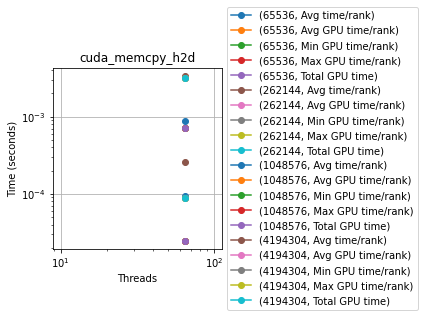

<Figure size 1440x1440 with 0 Axes>

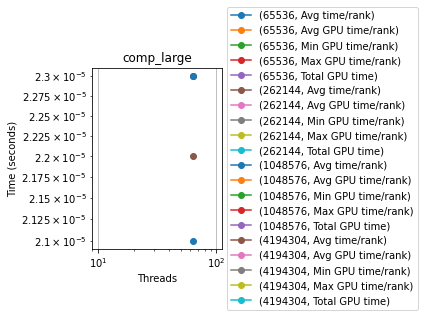

<Figure size 1440x1440 with 0 Axes>

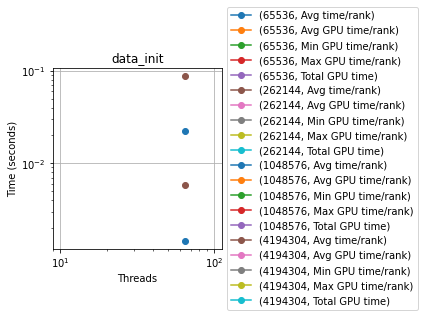

<Figure size 1440x1440 with 0 Axes>

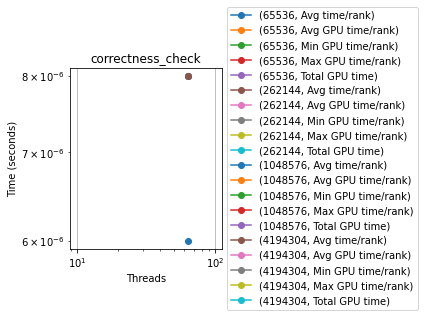

In [53]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [51]:
ctk.dataframe

65536        262144       1048576  \
                         Avg time/rank Avg time/rank Avg time/rank   
name         num_threads                                             
main         64               0.495571      0.332067      0.457133   
             128              0.465160      0.328475      0.343786   
             256              0.604006      0.531673      0.235333   
             512              0.609716      0.608071      0.342254   
comm         64               0.000164      0.000316      0.001449   
             128              0.000186      0.000320      0.001053   
             256              0.000151      0.000306      0.001089   
             512              0.000134      0.000328      0.001056   
comm_large   64               0.000130      0.000285      0.001399   
             128              0.000153      0.000286      0.001019   
             256              0.000118      0.000278      0.001055   
             512              0.000108      0.000298      0.001025   
cudaMemcpy_1 64               0.000115      0.000267      0.001365   
             128              0.000137      0.000269      0.001001   
             256              0.000103      0.000261      0.001035   
             512              0.000094      0.000282      0.001007   
comp         64               0.000451      0.000527      0.000940   
             128              0.000440      0.000491      0.000589   
             256              0.000483      0.000516      0.000709   
             512              0.000389      0.000443      0.000600   
comp_large   64               0.000441      0.000517      0.000920   
             128              0.000430      0.000480      0.000579   
             256              0.000473      0.000506      0.000697   
             512              0.000380      0.000434      0.000590   
data_init    64               0.000820      0.003216      0.013201   
             128              0.000865      0.003232      0.012039   
             256              0.000824      0.003254      0.011874   
             512              0.000823      0.003266      0.012627   

                               4194304  
                         Avg time/rank  
name         num_threads                
main         64               0.659693  
             128              0.689057  
             256              0.664524  
             512              0.666225  
comm         64               0.003756  
             128              0.003781  
             256              0.003702  
             512              0.003703  
comm_large   64               0.003730  
             128              0.003750  
             256              0.003673  
             512              0.003663  
cudaMemcpy_1 64               0.003712  
             128              0.003733  
             256              0.003653  
             512              0.003646  
comp         64               0.000713  
             128              0.000693  
             256              0.000705  
             512              0.000640  
comp_large   64               0.000702  
             128              0.000682  
             256              0.000694  
             512              0.000630  
data_init    64               0.048727  
             128              0.048626  
             256              0.048719  
             512              0.049538

## STRONG SCALING ------------------------------------------------------------------------------------


In [52]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("everything/*.cali"))

In [53]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                         profile                          
{'name': 'main', 'type': 'function'}         163954173     1  regionprofile   
                                             326140011     1  regionprofile   
                                             559730029     1  regionprofile   
                                             913823014     1  regionprofile   
                                             1004594117    1  regionprofile   
                                             1180476513    1  regionprofile   
                                             1718441184    1  regionprofile   
                                             1741210511    1  regionprofile   
                                             1841032922    1  regionprofile   
                                             2188916940    1  regionprofile   
                                             2332563332    1  regionprofile   
                                             2387394561    1  regionprofile   
                                             2483569216    1  regionprofile   
                                             3487736843    1  regionprofile   
                                             3654775129    1  regionprofile   
                                             3681567656    1  regionprofile   
{'name': 'comm', 'type': 'function'}         163954173     3  regionprofile   
                                             326140011     3  regionprofile   
                                             559730029     3  regionprofile   
                                             913823014     3  regionprofile   
                                             1004594117    3  regionprofile   
                                             1180476513    3  regionprofile   
                                             1718441184    3  regionprofile   
                                             1741210511    3  regionprofile   
                                             1841032922    3  regionprofile   
                                             2188916940    3  regionprofile   
                                             2332563332    3  regionprofile   
                                             2387394561    3  regionprofile   
                                             2483569216    3  regionprofile   
                                             3487736843    3  regionprofile   
                                             3654775129    3  regionprofile   
                                             3681567656    3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   163954173     4  regionprofile   
                                             326140011     4  regionprofile   
                                             559730029     4  regionprofile   
                                             913823014     4  regionprofile   
                                             1004594117    4  regionprofile   
                                             1180476513    4  regionprofile   
                                             1718441184    4  regionprofile   
                                             1741210511    4  regionprofile   
                                             1841032922    4  regionprofile   
                                             2188916940    4  regionprofile   
                                             2332563332    4  regionprofile   
                                             2387394561    4  regionprofile   
                                             2483569216    4  regionprofile   
                                             3487736843    4  regionprofile   
                                             3654775129    4  regionprofile   
                                             3681567656    4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 163954173     5  regionprofile   
                            

In [54]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,
163954173,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223876,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,ReverseSorted,64,1024,4,Handwritten
326140011,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224177,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,1perturbed,64,1024,4,Handwritten
559730029,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223238,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 256, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,256,256,4,Handwritten
913823014,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700027183,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,128,512,4,Handwritten
1004594117,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223226,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,128,512,4,Handwritten
1180476513,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701224183,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,1perturbed,128,512,4,Handwritten
1718441184,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1700021535,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 64, 65536]",g,BitonicSort,CUDA,int,4,65536,Random,64,1024,4,Handwritten
1741210511,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223247,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 512, 65536]",g,BitonicSort,CUDA,int,4,65536,Sorted,512,128,4,Handwritten
1841032922,2.10.0,"min#inclusive#sum#time.duration,max#inclusive#...",,2,node.order,regionprofile,spot,luis.e.martinez,1701223897,[/scratch/group/csce435-f23/Caliper-CUDA/calip...,"[./bitonic, 128, 65536]",g,BitonicSort,CUDA,int,4,65536,ReverseSorted,128,512,4,Handwritten


In [55]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     └─ \x1b1.000\x1b cudaMemcpy_1\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [56]:
gb = tk.groupby("InputType")

4  thickets created...
{'1perturbed': <thicket.thicket.Thicket object at 0x2b8cb673ca00>, 'Random': <thicket.thicket.Thicket object at 0x2b8cb6481a00>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x2b8cb651e520>, 'Sorted': <thicket.thicket.Thicket object at 0x2b8cb64b7670>}


In [57]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [58]:
ctk.dataframe

1perturbed  \
                                                                nid   
node                                         num_threads              
{'name': 'main', 'type': 'function'}         64                   1   
                                             128                  1   
                                             256                  1   
                                             512                  1   
{'name': 'comm', 'type': 'function'}         64                   3   
                                             128                  3   
                                             256                  3   
                                             512                  3   
{'name': 'comm_large', 'type': 'function'}   64                   4   
                                             128                  4   
                                             256                  4   
                                             512                  4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64                   5   
                                             128                  5   
                                             256                  5   
                                             512                  5   
{'name': 'comp', 'type': 'function'}         64                   6   
                                             128                  6   
                                             256                  6   
                                             512                  6   
{'name': 'comp_large', 'type': 'function'}   64                   7   
                                             128                  7   
                                             256                  7   
                                             512                  7   
{'name': 'data_init', 'type': 'function'}    64                   2   
                                             128                  2   
                                             256                  2   
                                             512                  2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128       

In [59]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "spot.channel"), ("Random", "spot.channel"), ("ReverseSorted", "spot.channel"), ("Sorted", "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "nid"), ("Random", "nid"), ("ReverseSorted", "nid"), ("Sorted", "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [60]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [61]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Min time/rank"), ("Random", "Min time/rank"), ("ReverseSorted", "Min time/rank"), ("Sorted", "Min time/rank")], axis=1)

In [62]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Max time/rank"), ("Random", "Max time/rank"), ("ReverseSorted", "Max time/rank"), ("Sorted", "Max time/rank")], axis=1)

In [63]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Avg time/rank"), ("Random", "Avg time/rank"), ("ReverseSorted", "Avg time/rank"), ("Sorted", "Avg time/rank")], axis=1)

In [64]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [65]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [66]:
ctk.dataframe

1perturbed     Random ReverseSorted     Sorted
                         Total time Total time    Total time Total time
name         num_threads                                               
main         64            0.333989   0.495571      0.314719   0.473958
             128           0.334907   0.465160      0.318824   0.494237
             256           0.321497   0.604006      0.319632   0.332196
             512           0.320888   0.609716      0.319725   0.332821
comm         64            0.000143   0.000164      0.000160   0.000163
             128           0.000156   0.000186      0.000143   0.000161
             256           0.000151   0.000151      0.000144   0.000143
             512           0.000152   0.000134      0.000152   0.000144
comm_large   64            0.000110   0.000130      0.000128   0.000130
             128           0.000121   0.000153      0.000111   0.000129
             256           0.000119   0.000118      0.000112   0.000111
             512           0.000110   0.000108      0.000121   0.000112
cudaMemcpy_1 64            0.000097   0.000115      0.000113   0.000114
             128           0.000104   0.000137      0.000097   0.000114
             256           0.000098   0.000103      0.000098   0.000097
             512           0.000097   0.000094      0.000106   0.000098
comp         64            0.000435   0.000451      0.000455   0.000449
             128           0.000478   0.000440      0.000418   0.000470
             256           0.000424   0.000483      0.000418   0.000425
             512           0.000428   0.000389      0.000414   0.000399
comp_large   64            0.000426   0.000441      0.000446   0.000440
             128           0.000468   0.000430      0.000409   0.000460
             256           0.000415   0.000473      0.000410   0.000416
             512           0.000419   0.000380      0.000405   0.000390
data_init    64            0.001182   0.000820      0.000280   0.000236
             128           0.001179   0.000865      0.000277   0.000246
             256           0.001178   0.000824      0.000281   0.000225
             512           0.001190   0.000823      0.000282   0.000245

In [67]:
# ctk.dataframe = ctk.dataframe.loc[:,(65536)]

# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1
# ctk.dataframe

In [68]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [69]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

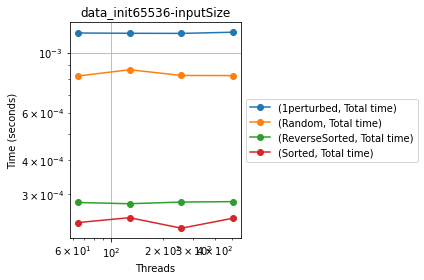

<Figure size 1440x1440 with 0 Axes>

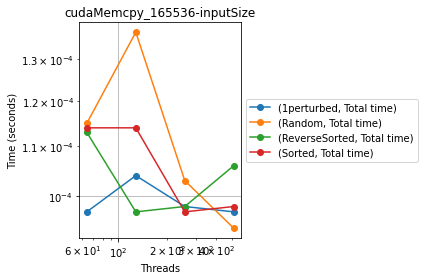

<Figure size 1440x1440 with 0 Axes>

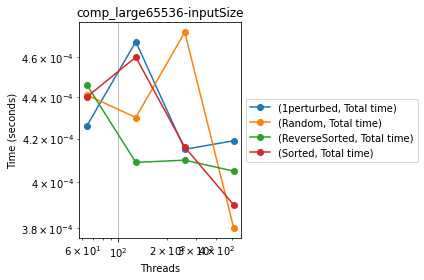

<Figure size 1440x1440 with 0 Axes>

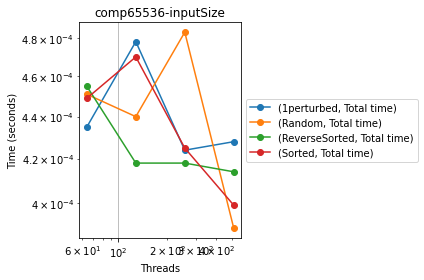

<Figure size 1440x1440 with 0 Axes>

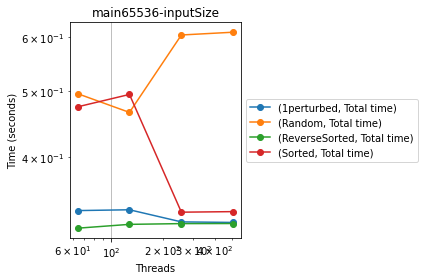

<Figure size 1440x1440 with 0 Axes>

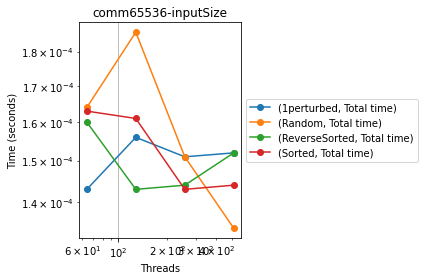

<Figure size 1440x1440 with 0 Axes>

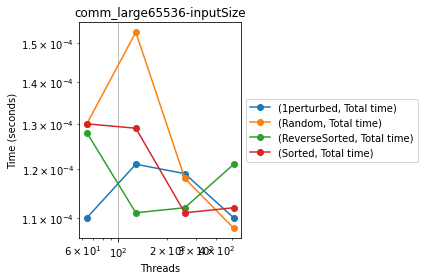

In [70]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name+"65536-inputSize",
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()